In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
filenames = ['twoLEDsignals_200traces_CH1.csv','twoLEDsignals_200traces_CH2.csv','twoLEDsignals_200traces_CH3.csv','twoLEDsignals_200traces_CH4.csv']
data_fromfile = np.loadtxt('06022022/'+filenames[1],delimiter=',')

In [18]:
def adjust(time, voltage,points):
    ## function to adjust time for t0, and voltage for baseline
    time_mid = (time[-1] - time[0])/2
    voltage_baseline = np.sum(voltage[0:points])/points
    #voltage_baseline = 0

    
    return time-time_mid, voltage-voltage_baseline

Text(0.5, 1.0, 'CH2')

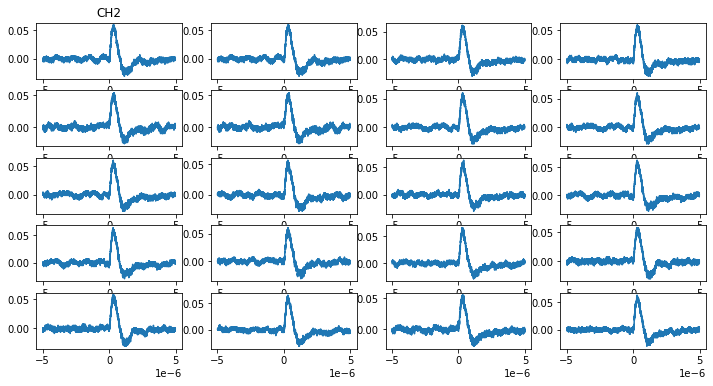

In [19]:
# for looking at traces side-by-side
fig1, axes1 = plt.subplots(nrows=5, ncols=4, sharex=False, sharey=False, figsize=(12,6))
for i in range(4,24):
    trace_num = i+1
    t_series = data_fromfile[:,0]
    V_series = data_fromfile[:,trace_num]
    t_spacing = t_series[1] - t_series[0]
    t_ped_range = 0.4e-5
    ts, Vs = adjust(t_series, V_series, int(t_ped_range/t_spacing))
    if i == 4:
        axes1[0][0].plot(ts,Vs)
    if i == 5:
        axes1[0][1].plot(ts,Vs)
    if i == 6:
        axes1[0][2].plot(ts,Vs)
    if i == 7:
        axes1[0][3].plot(ts,Vs)
    if i == 8:
        axes1[1][0].plot(ts,Vs)
    if i == 9:
        axes1[1][1].plot(ts,Vs)
    if i == 10:
        axes1[1][2].plot(ts,Vs)
    if i == 11:
        axes1[1][3].plot(ts,Vs)
    if i == 12:
        axes1[2][0].plot(ts,Vs)
    if i == 13:
        axes1[2][1].plot(ts,Vs)
    if i == 14:
        axes1[2][2].plot(ts,Vs)
    if i == 15:
        axes1[2][3].plot(ts,Vs)
    if i == 16:
        axes1[3][0].plot(ts,Vs)
    if i == 17:
        axes1[3][1].plot(ts,Vs)
    if i == 18:
        axes1[3][2].plot(ts,Vs)
    if i == 19:
        axes1[3][3].plot(ts,Vs)
    if i == 20:
        axes1[4][0].plot(ts,Vs)
    if i == 21:
        axes1[4][1].plot(ts,Vs)
    if i == 22:
        axes1[4][2].plot(ts,Vs)
    if i == 23:
        axes1[4][3].plot(ts,Vs)
axes1[0][0].set_title('CH2')

In [5]:
## find where voltages go negative relative to pedestal
def integrate(n):
    trace_num = n
    t_series = data_fromfile[:,0]
    V_series = data_fromfile[:,trace_num]
    t_spacing = t_series[1] - t_series[0]
    t_ped_range = 0.4e-5
    points = int(t_ped_range/t_spacing)
    ts, Vs = adjust(t_series, V_series, points)
    pedestal_std = np.std(Vs[0:points])
    
    # loop through times, only checking times after a small shift (after zero) to avoid issues
    t_stop = 0
    for i in range(len(ts)):
        if ts[i] > 0.0 + 0.2e-6 and Vs[i] < 0.0:
            t_stop = ts[i]
            #print('Crossed to negative here: ', t_stop * 1e6, ' usec')
            break
    index_stop = np.where(ts==t_stop)[0][0]

    # find index nearest to t=0
    index_nearzero = np.absolute(ts).argmin()
    t_nearzero = ts[index_nearzero]

    trace_integral = np.trapz(Vs[index_nearzero:index_stop], x=ts[index_nearzero:index_stop])
    return t_stop,t_nearzero, ts, Vs, trace_integral, pedestal_std


The integral under the positive curve =  2.6741387096774198e-08  V*s =  26.741387096774197  mV*us
Pedestal rms around 0 =  0.00211239397965309


Text(0.5, 0, 'usec')

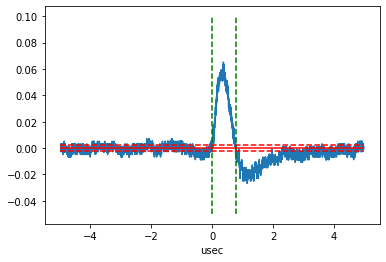

In [6]:
t_stop,t_nearzero, ts, Vs, trace_integral,pedestal_std = integrate(1)
print('The integral under the positive curve = ', trace_integral, ' V*s = ',trace_integral*1e6*1e3, ' mV*us')
print('Pedestal rms around 0 = ', pedestal_std)
plt.plot(ts*1e6,Vs,zorder=1)
plt.vlines(t_stop*1e6, -0.05,0.1,colors='g',linestyles='dashed',zorder=2) # integration stopping time
plt.vlines(t_nearzero*1e6, -0.05,0.1,colors='g',linestyles='dashed',zorder=3) # integration starting time
plt.hlines(0.0,-5,5,colors='r',zorder=4)
plt.hlines(pedestal_std,-5,5,colors='r',linestyles='dashed',zorder=5)
plt.hlines(-1*pedestal_std,-5,5,colors='r',linestyles='dashed',zorder=6)
plt.xlabel('usec')

In [7]:
# calculate all integrals the same way as above
integrals = []
for i in range(1,len(data_fromfile[1,:]) ):
    t_stop,t_nearzero, ts, Vs, trace_integral,pedestal_std = integrate(i)
    integrals.append(trace_integral)
integrals = np.array(integrals)

Text(0.5, 0, 'mV us')

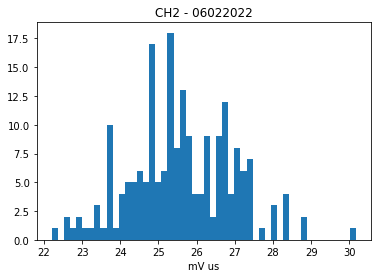

In [9]:
plt.hist(integrals*1e6*1e3, bins=50)
plt.title('CH2 - 06022022')
plt.xlabel('mV us')